Лабораторная работа номер 1

Упражнение 1

In [1]:
import sympy as sp
#a)
x = sp.Symbol('x')
I1 = sp.integrate(x*sp.sin(5*x), x)
sp.pprint(I1)

  x⋅cos(5⋅x)   sin(5⋅x)
- ────────── + ────────
      5           25   


In [2]:
#б)
I2 = sp.integrate(1/((x**2 + 1)*(x-2)**2), x)
sp.pprint(I2)

                      ⎛ 2    ⎞                       
  4⋅log(x - 2)   2⋅log⎝x  + 1⎠   3⋅atan(x)      1    
- ──────────── + ───────────── + ───────── - ────────
       25              25            25      5⋅x - 10


Упражнение 2

In [3]:
#a)
opr_I_1 = sp.integrate(sp.sqrt(1-x**2), (x, -1, 1))
sp.pprint(opr_I_1)

π
─
2


In [4]:
#б)
opr_I2 = sp.integrate((x * sp.exp(3*x)), (x, 0, 1))
sp.pprint(opr_I2)

       3
1   2⋅ℯ 
─ + ────
9    9  


Упражнение 3

In [15]:
def integral_sum_right(func, a, b, n):
    int_sum = 0
    step = (b - a)/n
    for i in range(1, n+1):
        ksi = a+i*step
        int_sum += func(ksi) * step
    return int_sum

def integral_sum_left(func, a, b, n):
    int_sum = 0
    step = (b - a)/n
    for i in range(0, n):
        ksi = a+i*step
        int_sum += func(ksi) * step
    return int_sum

In [16]:
def f(x):
    return x

print(integral_sum_right(f, 1, 2, 4))
print(integral_sum_left(f, 1, 2, 4))

1.625
1.375


In [19]:
# Проверка
# правый
print('right: ', (1.25+1.5+1.75+2)*0.25)
print('left: ', (1+1.25+1.5+1.75)*0.25)

right:  1.625
left:  1.375


Упражнение 4

In [28]:
from scipy.optimize import minimize_scalar

In [57]:
def upper_sum_Darbu(f, a, b, n):
    delta_x = (b - a) / n
    upper_sum = 0
    for i in range(n):
        xi = a + i * delta_x
        xi_plus_1 = a + (i + 1) * delta_x
        max_result = minimize_scalar(lambda x: -f(x), bounds=(xi, xi_plus_1))
        upper_sum += float(max_result.fun) * delta_x
    return -upper_sum

def lower_sum_Darbu(f, a, b, n):
    delta_x = (b - a) / n
    lower_sum = 0
    for i in range(n):
        xi = a + i * delta_x
        xi_plus_1 = a + (i + 1) * delta_x
        min_result = minimize_scalar(f, bounds=(xi, xi_plus_1))
        lower_sum += float(min_result.fun) * delta_x
    return lower_sum

In [58]:
def f(x):
    return x

print(upper_sum_Darbu(f, 1, 2, 4))
print(lower_sum_Darbu(f, 1, 2, 4))

1.6249936873469142
1.3750063126530858


Упражнение 5

In [59]:
import numpy as np

def f_5(x):
    return np.exp(-x**2)

print(integral_sum_right(f_5, 1, 2, 1000))
print(integral_sum_left(f_5, 1, 2, 1000))
print()
print(upper_sum_Darbu(f_5, 1, 2, 1000))
print(lower_sum_Darbu(f_5, 1, 2, 1000))

0.1350825312568837
0.1354320950591664

0.13543042344391493
0.1350841997178889


Упражнение 6

In [61]:
import numpy as np
from scipy import integrate
  
x_1 = np.linspace(1, 2, 100)
x_2 = np.linspace(1, 2, 1000)
print(f'При разбиении на 100: {integrate.simpson(np.exp(-x_1**2), x_1)}')
print(f'При разбиении на 1000: {integrate.simpson(np.exp(-x_2**2), x_2)}')

При разбиении на 100: 0.13525725749864728
При разбиении на 1000: 0.13525725794995166


Упражнение С1

In [65]:
Integral = sp.integrate(1/(sp.sqrt(x**2 + 2*x + 3)), x)
sp.pprint(Integral)

     ⎛√2⋅(x + 1)⎞
asinh⎜──────────⎟
     ⎝    2     ⎠


Без использования python:

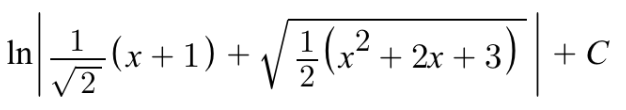

Упражнение С2

In [68]:
opr_Int = sp.integrate(x*sp.cos(x**2), (x, 0, sp.pi/2))
sp.pprint(opr_Int)

   ⎛ 2⎞
   ⎜π ⎟
sin⎜──⎟
   ⎝4 ⎠
───────
   2   


Упражнение С3

In [69]:
def lambda_int_sum(f, a, b, n, l):
    summ = 0
    ln = abs(b - a)
    dxi = ln/n
    for i in range(1, n + 1, 1):
        summ += f.subs(x, ((a + ((i/n)*ln) - dxi)) + dxi * l) * dxi
    return summ

In [71]:
x = sp.symbols('x')
f = x
print(lambda_int_sum(f, 1, 2, 4, 0.5))

1.50000000000000


Задание 1

In [72]:
def lambda_int_sum(f, a, b, n, l):
    summ = 0
    ln = abs(b - a)
    dxi = ln/n
    for i in range(1, n + 1, 1):
        summ += f.subs(x, ((a + ((i/n)*ln) - dxi)) + dxi * l) * dxi
    return summ

In [87]:
x = sp.symbols('x')
f = -x**2
for i in range(1, 11):
    print(f'{2**i} части, отношение 1/3: {lambda_int_sum(f, -4, 2, 2**i, 1/3)}')

2 части, отношение 1/3: -11.1111111111111
4 части, отношение 1/3: -10.4444444444444
8 части, отношение 1/3: -9.94444444444444
16 части, отношение 1/3: -9.65277777777778
32 части, отношение 1/3: -9.49652777777778
64 части, отношение 1/3: -9.41579861111112
128 части, отношение 1/3: -9.37478298611110
256 части, отношение 1/3: -9.35411241319447
512 части, отношение 1/3: -9.34373643663189
1024 части, отношение 1/3: -9.33853827582475


Задание 2

In [86]:
def f(x):
    return -x**2
for i in range(1, 11):
    print(upper_sum_Darbu(f, -3, -1, 2**i))
    print(lower_sum_Darbu(f, -3, -1, 2**i))

-18.00017882646916
-69.99953505390903
-28.000179770655592
-53.99971411836427
-33.7502911720202
-46.74963307805556
-36.812740088367704
-43.312230621781744
-38.39096265623234
-41.6402672902922
-39.19168217530851
-40.816122271804005
-39.59491821144208
-40.407032140552396
-39.797415905261445
-40.20307022969962
-39.89871291038862
-40.10140838897535
-39.94954913992271
-40.05048081076547
